In [1]:
#Import all of our necessary libraries

import os
import pandas as pd
import csv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [2]:
with open("Log-batteryusage.txt") as csv_file:
    data = list(csv.reader(csv_file, delimiter=','))
    num_iters = len(data)-1
    num_nodes = len(data[0])-2
    batteryLevels = [[0]*num_nodes for _ in range(num_iters)]
    row_count = -1
    for row in data:
        row_count = row_count+1
        for i in range(0,len(row)-2):
            if(row_count < 200):
                batteryLevels[row_count][i] = float(data[row_count+1][i])

batteryFreq = [[0]*10]*199
for row_num in range(0,199):
    for col in range(0,10):
        ind = int(batteryLevels[row_num ][col]/10)
        batteryFreq[row_num ][ind] += 1

In [3]:
batteryFreq = [[0]*10 for _ in range(200)]
for row_num in range(0,num_iters-1):
    for col in range(0,num_nodes-2):
        ind = int(batteryLevels[row_num][col+1]/10)
        temp = batteryFreq[row_num][ind] + 1
        batteryFreq[row_num][ind] = temp

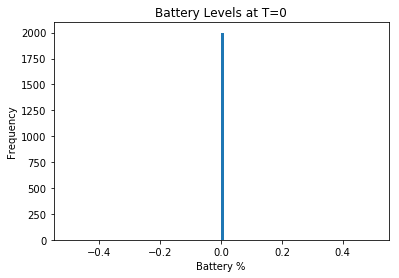

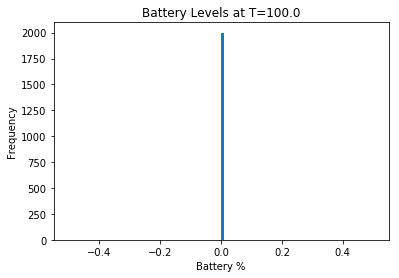

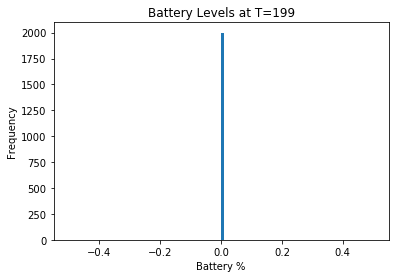

In [4]:
plt.hist(batteryLevels[0][1:], bins=100)
plt.title("Battery Levels at T=0")
plt.xlabel("Battery %")
plt.ylabel("Frequency")
plt.show()

plt.hist(batteryLevels[int(num_iters/2)][1:], bins=100)
middle = str(num_iters/2)
plt.title("Battery Levels at T="+middle)
plt.xlabel("Battery %")
plt.ylabel("Frequency")
plt.show()

plt.hist(batteryLevels[num_iters-1][1:], bins=100)
end = str(num_iters-1)
plt.title("Battery Levels at T="+end)
plt.xlabel("Battery %")
plt.ylabel("Frequency")
plt.show()

In [5]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 100), ylim=(0, 400))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = [0,10,20,30,40,50,60,70,80,90]
    y = batteryFreq[i]
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=25, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html

#to save file:
#anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

HTML(anim.to_html5_video())

In [6]:
def update_hist(num):
    plt.cla()
    plt.hist(batteryLevels[num])

fig = plt.figure()
hist = plt.hist(batteryLevels[0])

animation = animation.FuncAnimation(fig, update_hist, num_iters, fargs=(num) )
HTML(animation.to_html5_video())

NameError: name 'num' is not defined